The notebook is linked to the article:

https://towardsdatascience.com/backtest-trading-strategies-with-pandas-vectorized-backtesting-26001b0ba3a5

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.autolayout'] = True
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['axes.grid'] = True
plt.style.use('fivethirtyeight')

In [2]:
yf_prices = yf.download(['AAPL', 'MSFT', 'GOOG', 'FB'], start='2015-01-01')

[*********************100%***********************]  4 of 4 completed


In [5]:
yf_prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1670 entries, 2015-01-02 to 2021-08-19
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, AAPL)  1670 non-null   float64
 1   (Adj Close, FB)    1670 non-null   float64
 2   (Adj Close, GOOG)  1670 non-null   float64
 3   (Adj Close, MSFT)  1670 non-null   float64
 4   (Close, AAPL)      1670 non-null   float64
 5   (Close, FB)        1670 non-null   float64
 6   (Close, GOOG)      1670 non-null   float64
 7   (Close, MSFT)      1670 non-null   float64
 8   (High, AAPL)       1670 non-null   float64
 9   (High, FB)         1670 non-null   float64
 10  (High, GOOG)       1670 non-null   float64
 11  (High, MSFT)       1670 non-null   float64
 12  (Low, AAPL)        1670 non-null   float64
 13  (Low, FB)          1670 non-null   float64
 14  (Low, GOOG)        1670 non-null   float64
 15  (Low, MSFT)        1670 non-null   float64
 16  (Open,

# 1. Single Asset Simulation

In [6]:
prices = yf_prices['Adj Close']['AAPL']
prices.head()

Date
2015-01-02    24.782110
2015-01-05    24.083958
2015-01-06    24.086227
2015-01-07    24.423975
2015-01-08    25.362394
Name: AAPL, dtype: float64

In [13]:
rs = prices.apply(np.log).diff(1).fillna(0)  # take ln(), then the difference of current element with the previous one, fill n/a with zeros
rs

Date
2015-01-02    0.000000
2015-01-05   -0.028576
2015-01-06    0.000094
2015-01-07    0.013925
2015-01-08    0.037702
                ...   
2021-08-13    0.001409
2021-08-16    0.013457
2021-08-17   -0.006173
2021-08-18   -0.025832
2021-08-19    0.002320
Name: AAPL, Length: 1670, dtype: float64

In [14]:
w1 = 5
w2 = 22

In [19]:
w1_rolled = prices.rolling(w1).mean()
w1_rolled.head(2*w1 + w2)

Date
2015-01-02          NaN
2015-01-05          NaN
2015-01-06          NaN
2015-01-07          NaN
2015-01-08    24.547733
2015-01-09    24.669230
2015-01-12    24.805234
2015-01-13    24.984758
2015-01-14    25.077693
2015-01-15    24.847846
2015-01-16    24.574932
2015-01-20    24.550905
2015-01-21    24.520531
2015-01-22    24.638400
2015-01-23    24.917662
2015-01-26    25.239991
2015-01-27    25.259032
2015-01-28    25.520158
2015-01-29    25.814833
2015-01-30    26.004332
2015-02-02    26.255031
2015-02-03    26.686161
2015-02-04    26.878833
2015-02-05    26.947441
2015-02-06    27.048962
2015-02-09    27.119797
2015-02-10    27.294405
2015-02-11    27.557929
2015-02-12    27.854674
2015-02-13    28.225607
2015-02-17    28.594722
2015-02-18    28.899662
Name: AAPL, dtype: float64

In [20]:
w2_rolled = prices.rolling(w2).mean()
w2_rolled.head(2*w1 + w2)

Date
2015-01-02          NaN
2015-01-05          NaN
2015-01-06          NaN
2015-01-07          NaN
2015-01-08          NaN
2015-01-09          NaN
2015-01-12          NaN
2015-01-13          NaN
2015-01-14          NaN
2015-01-15          NaN
2015-01-16          NaN
2015-01-20          NaN
2015-01-21          NaN
2015-01-22          NaN
2015-01-23          NaN
2015-01-26          NaN
2015-01-27          NaN
2015-01-28          NaN
2015-01-29          NaN
2015-01-30          NaN
2015-02-02          NaN
2015-02-03    25.244215
2015-02-04    25.349618
2015-02-05    25.495547
2015-02-06    25.630926
2015-02-09    25.759125
2015-02-10    25.868459
2015-02-11    26.006140
2015-02-12    26.188602
2015-02-13    26.367483
2015-02-17    26.558449
2015-02-18    26.789326
Name: AAPL, dtype: float64

In [21]:
ma_x = prices.rolling(w1).mean() - prices.rolling(w2).mean()
ma_x.head(2*w1 + w2)

Date
2015-01-02         NaN
2015-01-05         NaN
2015-01-06         NaN
2015-01-07         NaN
2015-01-08         NaN
2015-01-09         NaN
2015-01-12         NaN
2015-01-13         NaN
2015-01-14         NaN
2015-01-15         NaN
2015-01-16         NaN
2015-01-20         NaN
2015-01-21         NaN
2015-01-22         NaN
2015-01-23         NaN
2015-01-26         NaN
2015-01-27         NaN
2015-01-28         NaN
2015-01-29         NaN
2015-01-30         NaN
2015-02-02         NaN
2015-02-03    1.441946
2015-02-04    1.529215
2015-02-05    1.451894
2015-02-06    1.418035
2015-02-09    1.360672
2015-02-10    1.425946
2015-02-11    1.551789
2015-02-12    1.666072
2015-02-13    1.858124
2015-02-17    2.036272
2015-02-18    2.110336
Name: AAPL, dtype: float64

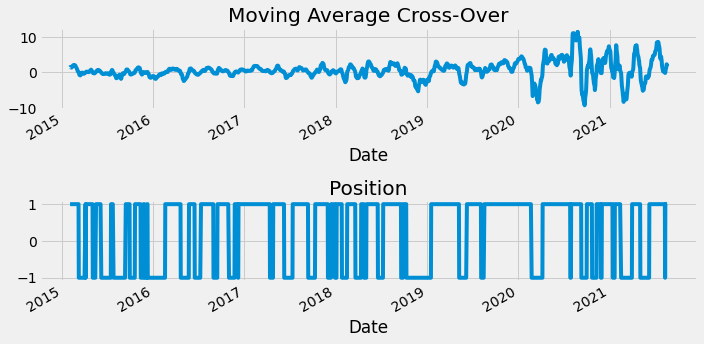

In [23]:
pos = ma_x.apply(np.sign)

fig, ax = plt.subplots(2,1)
ma_x.plot(ax=ax[0], title='Moving Average Cross-Over')
pos.plot(ax=ax[1], title='Position')
plt.savefig('tmp.png')

In [25]:
my_rs = pos.shift(1)*rs  # positions have been shifted by 1 time-step, which is done to avoid look-ahead bias
my_rs.head(2*w1 + w2)

Date
2015-01-02         NaN
2015-01-05         NaN
2015-01-06         NaN
2015-01-07         NaN
2015-01-08         NaN
2015-01-09         NaN
2015-01-12         NaN
2015-01-13         NaN
2015-01-14         NaN
2015-01-15         NaN
2015-01-16         NaN
2015-01-20         NaN
2015-01-21         NaN
2015-01-22         NaN
2015-01-23         NaN
2015-01-26         NaN
2015-01-27         NaN
2015-01-28         NaN
2015-01-29         NaN
2015-01-30         NaN
2015-02-02         NaN
2015-02-03         NaN
2015-02-04    0.007640
2015-02-05    0.007112
2015-02-06   -0.008457
2015-02-09    0.006620
2015-02-10    0.019029
2015-02-11    0.023168
2015-02-12    0.012572
2015-02-13    0.004891
2015-02-17    0.005885
2015-02-18    0.006938
Name: AAPL, dtype: float64

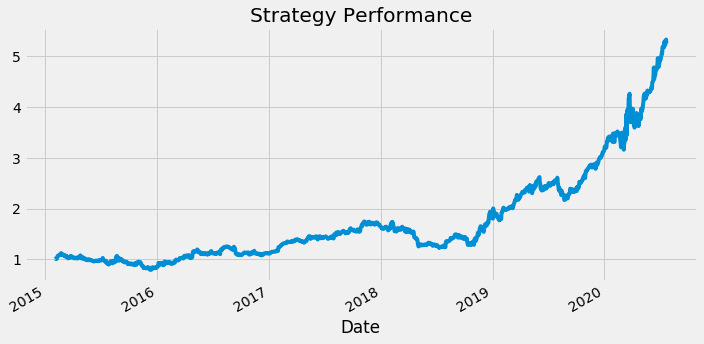

In [15]:
my_rs.cumsum().apply(np.exp).plot(title='Strategy Performance')
# rs.cumsum().apply(np.exp).plot()
# plt.legend(['my performance', 'benchmark performance'])
plt.savefig('tmp.png')

# 2. Multi-Assets Simulation

In [19]:
prices = yf_prices['Adj Close']
rs = prices.apply(np.log).diff(1).fillna(0)

In [20]:
w1 = 5
w2 = 22
ma_x = prices.rolling(w1).mean() - prices.rolling(w2).mean()

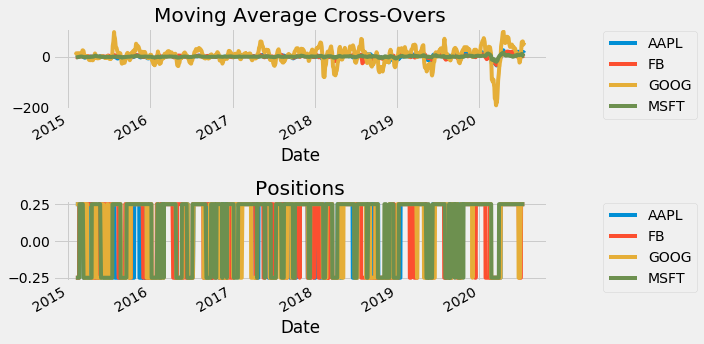

In [22]:
pos = ma_x.apply(np.sign)
pos /= pos.abs().sum(1).values.reshape(-1,1)

fig, ax = plt.subplots(2,1)
ma_x.plot(ax=ax[0], title='Moving Average Cross-Overs')
ax[0].legend(bbox_to_anchor=(1.1, 1.05))
pos.plot(ax=ax[1], title='Positions')
ax[1].legend(bbox_to_anchor=(1.1, 1.05))
plt.savefig('tmp.png')

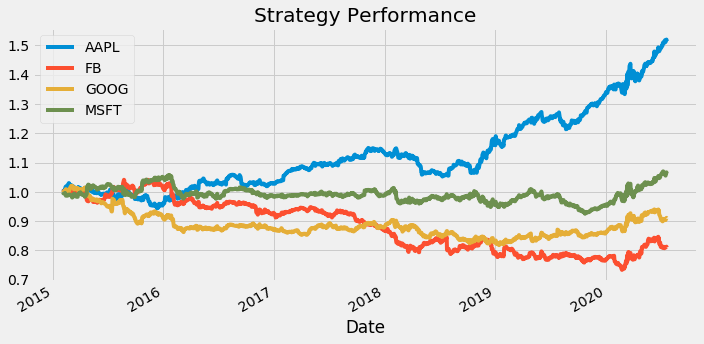

In [24]:
my_rs = (pos.shift(1)*rs)

my_rs.cumsum().apply(np.exp).plot(title='Strategy Performance')
# rs.mean(1).cumsum().apply(np.exp).plot()
# plt.legend(['my performance', 'benchmark performance'])
plt.savefig('tmp.png')

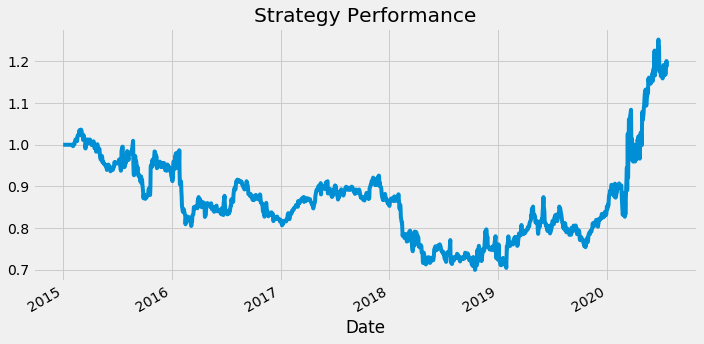

In [25]:
my_rs = (pos.shift(1)*rs).sum(1)

my_rs.cumsum().apply(np.exp).plot(title='Strategy Performance')
# rs.mean(1).cumsum().apply(np.exp).plot()
# plt.legend(['my performance', 'benchmark performance'])
plt.savefig('tmp.png')

**Look-ahead bias**

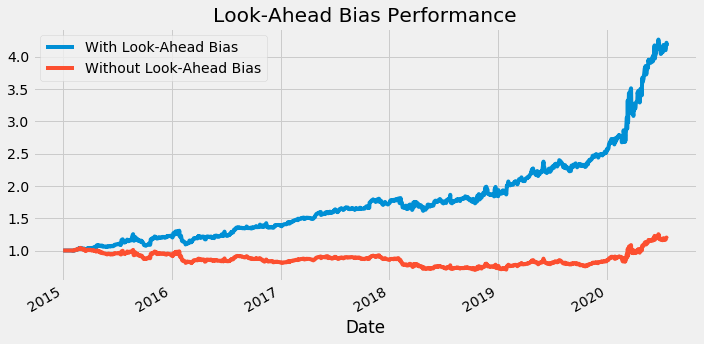

In [27]:
my_rs1 = (pos*rs).sum(1)
my_rs2 = (pos.shift(1)*rs).sum(1)

my_rs1.cumsum().apply(np.exp).plot(title='Look-Ahead Bias Performance')
my_rs2.cumsum().apply(np.exp).plot()
plt.legend(['With Look-Ahead Bias', 'Without Look-Ahead Bias'])
# rs.mean(1).cumsum().apply(np.exp).plot()
# plt.legend(['my performance', 'benchmark performance'])
plt.savefig('tmp.png')

# 3. Evaluating Strategy Robustness

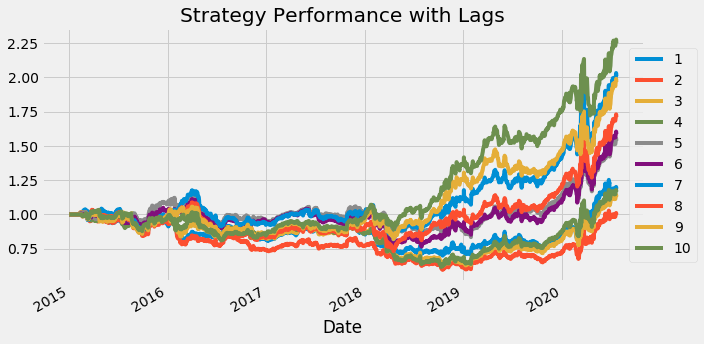

In [28]:
lags = range(1, 11)
lagged_rs = pd.Series(dtype=float, index=lags)

for lag in lags:
    my_rs = (pos.shift(lag)*rs).sum(1)
    my_rs.cumsum().apply(np.exp).plot()
    lagged_rs[lag] = my_rs.sum()

plt.title('Strategy Performance with Lags')    
plt.legend(lags, bbox_to_anchor=(1.1, 0.95))
plt.savefig('tmp.png')

# 4. Simulating Transaction Costs

In [30]:
tc_pct = 0.01

In [31]:
delta_pos = pos.diff(1).abs().sum(1)
my_tcs = tc_pct*delta_pos

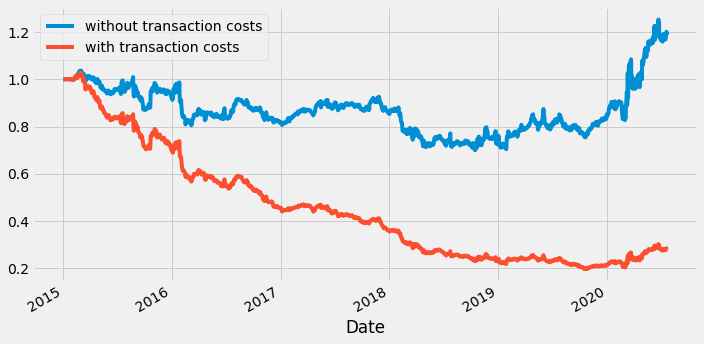

In [32]:
my_rs1 = (pos.shift(1)*rs).sum(1)
my_rs2 = (pos.shift(1)*rs).sum(1) - my_tcs

my_rs1.cumsum().apply(np.exp).plot()
my_rs2.cumsum().apply(np.exp).plot()
plt.legend(['without transaction costs', 'with transaction costs'])
plt.savefig('tmp.png')